In [8]:
# !pip install TensorFlow==2.15
# !pip install svgling
# !pip install -U jupyter_server
# !pip install ipywidgets
# !Clear Notebook Widgets State
# !% jq -M 'del(.metadata.widgets)' 001_vector_search.ipynb > 001_vector_search.fixed.ipynb
# !% jupyter nbconvert --to html 001_vector_search.fixed.ipynb
# !  [NbConvertApp] Converting notebook 001_vector_search.fixed.ipynb to html
# !  [NbConvertApp] Writing 629781 bytes to 001_vector_search.fixed.html

# !% open 001_vector_search.fixed.html
!% jupyter --version

zsh:fg:1: no job control in this shell.




## Lab 1: ConceptNet Ethics Testing

### Authors: Robert Miller Student ID: 49156334

### "      "  Ananya Das Manolyl Student ID: 49020860

### "      "  Jason Brown Student ID: 48999280









### Overview

#### Certain names have higher sentiment, this maybe due to the populartiy of actors or directors, so when the user knows that certain actor is present there are chances that they like the movie. So there is a bias associated with the names, we will be epxloring that in today's lab

#### Gender bias seems to have always been a part of modern society. This bias can determine how much money a person can make, what jobs a person can take, and so many other facets in modern society. To fix this detriment to society, gender bias needs to be investigated wherever it may lurk, and it honestly can lurk anywhere like in movie reviews. Gender bias in movie reviews that can be found in an IMDb (International Movie Database) dataset could be present in various types of ways, the most particular ways are in the disparities between how male and female characters are portrayed, the language used to describe them, and the overall sentiment towards movies featuring male versus female protagonists. Analyzing this bias is relevant for the below several reasons:

#### To Identify Poor Representation and Stereotyping: Through examining these reviews, we can uncover whether certain gender stereotypes are perpetuated in the portrayal of characters. For example, are female characters consistently depicted as weak or subordinate, while male characters are portrayed as strong and dominant? Such biases can reinforce societal stereotypes and contribute to the underrepresentation of certain genders in the media. After identifying these misrepresentations and stereotypes, these misconstrued versions of one’s gender can be removed, and a more reliable and fair representation of the different genders can in a movie reviews dataset.



#### To Address the Impact on Audiences: Gender bias in movie reviews can influence how audiences perceive and interact with films. A biased review may deter a viewer towards or away from a movie. In this case, gender bias determines the overall success of the movie, actors, and producers. Thus, it could be imperative to the ethical movie industry stakeholders to want to correct as they don’t want to be hurt by bias and don’t want to capitalize of it either.





#### To Correct Algorithmic Biases: Machine learning models trained on biased datasets can perpetuate and even exacerbate existing biases. For instance, what if a biased dataset was used for sentiment analysis or a recommender system, this could lead to widely inaccurate results, a lack of fairness for shareholders and participants, decreased reliability in algorithmic decision making.  



#### To Foster Ethics: Addressing bias in names in machine learning models aligns with broader ethical considerations in AI development. As it bolsters fairness, increases transparency, and ultimately leads to accountability.  



#### A Beneficial Domino Effect: A broader implication can be made from the findings of investigations into bias in names in IMDb reviews that go way beyond the specific IMDb dataset and domain. Developing an understanding of the manifestations and mechanisms of bias in one context will provide approaches on how to identify and mitigate bias in other datasets and applications. Thus, benefitting many other fields like researchers, practitioners, and society.



#### By investigating bias on names in IMDB reviews, researchers and practitioners contribute to the advancement of fair and inclusive AI systems, promote proper representation in media, and foster a greater awareness for the ethical implications of algorithmic decision making.  



### Questions



#### How much of a disparity exists in the IMDb reviews when it comes to the consideration of gender? Is there a relation between gender and movie’s revenue or popularity?



#### How does this bias affect sentiment towards nearby terms in the embedding space of a large language model?



#### Does this bias influence biases towards another person’s name like the GloVe LLM displayed a bias for names in different demographic groups.

#### Does using Conceptnet help to mitigate this bias?

#### How do other LLMs like Word2Vec and GloVe compare to Conceptnets?

#### Which classifiers like SGD, RandomForest, GaussianNB, or Support Vector machines provides the highest accuracy in identify the right sentiment?



#### Our hypothesis is that there is a bias present in the IMDb dataset among the names. Thus, using ConceptNet we will attempt to mitigate an existing bias present in the dataset through interaction in the embedding space. Our methods to achieve this is and clean this dataset, perform summary statistics to visualize the bias, then use NER (Name Entity Recognition) and sentiment analyses on the dataset to extrapolate a positive, negative, and neutral names from the dataset. This new dataset will be used as train and test vectors to be used with different classifiers against different Large Language Models like Word2Vec, GloVe, and ConceptNet numberbatch that are loaded into the embedding space.

# Lab 1: Investigating Bias among names Using Sentiment of Movie Cast Member First Names


## Summary

This investigation seeks to understand if there is bias found in movie data that has some correlation with sentiment analysis of cast member names.

Ultimately, the goal of the analysis is to uncover bias  among names of moviegoing audiences in two ways. First, by analyzing and visualizing data captured for movies indicating success at the skewed towards positve,negative or neutral names. Next, identifying  bias based on stats test.

The inspiration of this analysis is the phenomena of "[review bombing](https://theweek.com/feature/briefing/1024746/the-troubling-rise-of-review-bombing)" that has been documented in the news for a variety of popular media categories.

## Methodology

First, a dataset of movie titles and corresponding movie casts is downloaded, and pre-processed. Some initial EDA (exploratory data analysis) is run to identify if  bias patterns arise

Second, the investigation will load text embeddings. Positive and negative labels for embeddings will be loaded. Then a model will be trained to predict sentiment for the first names of cast members of the +35k movies in the dataset.

Lastly, correlations will be examined between popularity, revenue, audience voting data and predicted sentiment of first and second billed actors.


In [2]:
from sklearn.feature_extraction.text import CountVectorizer # to create bag of words/ document-term matrix
from nltk.tokenize import word_tokenize # tokenizing the words
from nltk.corpus import stopwords # to remove stopwords
from sklearn.decomposition import TruncatedSVD # to reduce dimensionality
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from transformers import BertTokenizer, BertForTokenClassification
from nltk import ne_chunk
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import ast
from collections import Counter
import seaborn as sns

import torch
import re
import string # for string operations
import numpy as np
import pandas as pd # for loading data
import nltk # for text processing

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [4]:

nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('stopwords')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)




[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


References:
- Used the code provided by professor: https://github.com/8000net/LectureNotesMaster/blob/master/01%20ConceptNet.ipynb
- Used the following code to work with lstm: https://www.kaggle.com/code/parvsoni/sentiment-analysis-simple-rnn-vs-lstm

# Loading Data

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/

Mounted at /content/drive
/content/drive/My Drive


In [6]:
%cd /content/drive/My Drive/'Colab Notebooks'/SentimentAnalysis

/content/drive/My Drive/Colab Notebooks/SentimentAnalysis


In [65]:
df = pd.read_csv("IMDBDataset.csv")# load the dataset
# df.shape

# Data Preprocessing

In [8]:
%%time
def load_embeddings(filename):
    """
    Load a DataFrame from the generalized text format used by word2vec, GloVe,
    fastText, and ConceptNet Numberbatch. The main point where they differ is
    whether there is an initial line with the dimensions of the matrix.
    """
    labels = []
    rows = []
    with open(filename, encoding='utf-8') as infile:
        for i, line in enumerate(infile):
            items = line.rstrip().split(' ')
            if len(items) == 2:
                # This is a header row giving the shape of the matrix
                continue
            labels.append(items[0])
            values = np.array([float(x) for x in items[1:]], 'f')
            rows.append(values)

    arr = np.vstack(rows)
    return pd.DataFrame(arr, index=labels, dtype='f')


CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 10 µs


# Data Split

In [66]:
#set all the positives to 1 and negatives to 0
y_labels = [1 if target == "positive" else 0 for target in df['sentiment']]


In [67]:
#split the data to 80% train and 20% test
raw_X_train, raw_X_test, y_train, y_test,train_labels,test_labels  = train_test_split(df['review'], y_labels, targets,  test_size=0.2, random_state=42)


In [ ]:
train_data =pd.DataFrame(raw_X_train)
train_data['sentiment']=y_train
train_data= train_data.reset_index(drop=True)
train_data.head(3)

In [68]:
test_data =pd.DataFrame(raw_X_test)
test_data['sentiment']=y_test
test_data= test_data.reset_index(drop=True)
test_data.head(3)

,review,sentiment
0,I really liked this Summerslam due to the look...,1
1,Not many television shows appeal to quite as m...,1
2,The film quickly gets to a major chase scene w...,0


In [69]:
test_data.shape

(10000, 2)

In [9]:
import re
TOKEN_RE = re.compile(r"\w.*?\b")
# The regex above finds tokens that start with a word-like character (\w), and continues
# matching characters (.+?) until the next word break (\b). It's a relatively simple
# expression that manages to extract something very much like words from text.

def vecs_to_sentiment(vecs,model):
    # predict_log_proba gives the log probability for each class
    predictions = model.predict_log_proba(vecs)

    # To see an overall positive vs. negative classification in one number,
    # we take the log probability of positive sentiment minus the log
    # probability of negative sentiment.
    # this is a logarithm of the max margin for the classifier,
    # similar to odds ratio (but not exact) log(p_1/p_0) = log(p_1)-log(p_0)
    return predictions[:, 1] - predictions[:, 0]


def words_to_sentiment(words,embeddings, model):
    vecs = embeddings.loc[words].dropna()
    log_odds = vecs_to_sentiment(vecs,model)
    return pd.DataFrame({'sentiment': log_odds}, index=vecs.index)
def text_to_sentiment(text,model):
    # tokenize the input phrase
    tokens = [token.casefold() for token in TOKEN_RE.findall(text)]
    # send each token separately into the embedding, then the classifier
    sentiments = words_to_sentiment(tokens,model)
    return sentiments['sentiment'].mean() # return the mean for the classifier

In [10]:

def remove_punctuation(word):
    '''
    checking for punctuations on each word and removing it
    '''
    return ''.join(char for char in word if char.isalnum())
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def text_preprocessing(text):
    """
    processing the text by removing any punctuations and stopwords
    """
    tokens = text.split(' ') # splitting the sentence to texts
    tokens_no_punct = [remove_punctuation(word) for word in tokens] # removing punctuations from the sentence
    tokens = [word for word in tokens_no_punct if word not in stop_words] # removing stop_words from the sentence
    return tokens

# NER recognition
- obtaining the NER tags for each word in the train dataset to identify the names of people.
- Grouping the names to positive, negative and neutral names

Since our dataset is movies review dataset, we believe there is a chance for bias with respect to actor, actress, director or any person's name mentioned.

In [ ]:
# loading the bert model pretrained on NER tags
# i have referred this from an online article on medium
tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER-uncased")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER-uncased were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
positive_df = train_data.query('sentiment == 1').reset_index(drop=True)['review']
negative_df = train_data.query('sentiment == 0').reset_index(drop=True)['review']

In [ ]:
# created a pipeline for positive sentiment dataset to obtain pos tags for each word based on ner recognition using bert
nlp = pipeline("ner", model=model, tokenizer=tokenizer,)
positive_df_1 = pd.DataFrame(positive_df)
positive_df_1['result']=""
positive_df_1['mod_review']=''
for i,row in enumerate(positive_df_1['review']):
    positive_df_1['mod_review'][i] =text_preprocessing(row)
    positive_df_1['result'][i] = nlp(positive_df_1['mod_review'][i])

In [ ]:
# created dataframe for the ner tags generated for all the words
temp_df=pd.DataFrame(columns=['O','B-MISC','I-MISC','B-PER','I-PER','B-ORG','I-ORG','B-LOC','I-LOC'])
for i,row in enumerate(positive_df_1['review']):
    k = pd.DataFrame(positive_df_1['result'][i])
    if len(positive_df_1['result'][i])>0:
      k = k.groupby(['entity']).agg({'word':list}).T
      k=k.reset_index(drop=True).rename_axis(None, axis="columns")
      temp_df = pd.concat([temp_df,k])

# temp_df.reset_index(drop=True).to_csv('positive_train_data.csv',index=False)

In [11]:
# temp_df = pd.read_csv('positive_train_data.csv')
# temp_df.head(3)

,O,B-MISC,I-MISC,B-PER,I-PER,B-ORG,I-ORG,B-LOC,I-LOC
0,NaN,"['chinese', 'eastern']",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,['duke'],"['of', 'earl']","['leonardo', 'vida', 'wilder', 'wilder', 'vida...","['di', '##cap', '##rio']",NaN,NaN,NaN,NaN
2,NaN,['civil'],['war'],NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# created a pipeline for negative sentiment dataset to obtain pos tags for each word based on ner recognition using bert
nlp = pipeline("ner", model=model, tokenizer=tokenizer,)
negative_df_1 = pd.DataFrame(negative_df)
negative_df_1['result']=""
for i,row in enumerate(negative_df_1['review']):
    negative_df_1['result'][i] = nlp(text_preprocessing(row))

In [ ]:
# created dataframe for the ner tags generated for all the words
neg_temp_df=pd.DataFrame(columns=['O','B-MISC','I-MISC','B-PER','I-PER','B-ORG','I-ORG','B-LOC','I-LOC'])
for i,row in enumerate(negative_df_1['review']):
    k = pd.DataFrame(negative_df_1['result'][i])
    if len(negative_df_1['result'][i])>0:
      k = k.groupby(['entity']).agg({'word':list}).T
      k=k.reset_index(drop=True).rename_axis(None, axis="columns")
      neg_temp_df = pd.concat([neg_temp_df,k])
neg_temp_df.reset_index(drop=True).to_csv('negative_train_data.csv',index=False)

In [12]:
# neg_temp_df = pd.read_csv('negative_train_data.csv')
# neg_temp_df.head(3)

,O,B-MISC,I-MISC,B-PER,I-PER,B-ORG,I-ORG,B-LOC,I-LOC
0,NaN,['british'],NaN,"['nic', '##hol', 'was', '##im', 'sami', 'snow'...","['##a', 'bu', '##rley', 'za', '##kir', '##na',...",NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,"['cork', '##y', 'cork', '##y', 'chris', 'cork'...","['romano', 'romano', 'kat', '##tan', '##y', 'k...",NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,"['fu', '##lc', '##i', 'brett', 'blue', 'mario'...","['sc', '##hl', '##ock', '##er', 'hal', '##sey'...",NaN,['##be'],['prague'],NaN


# Visualization

- Our focus is to obtain the names of people from the train dataset. Thus we will consider the column ['B-ORG'].
- We have generated a word cloud and also a line chart to understand our data

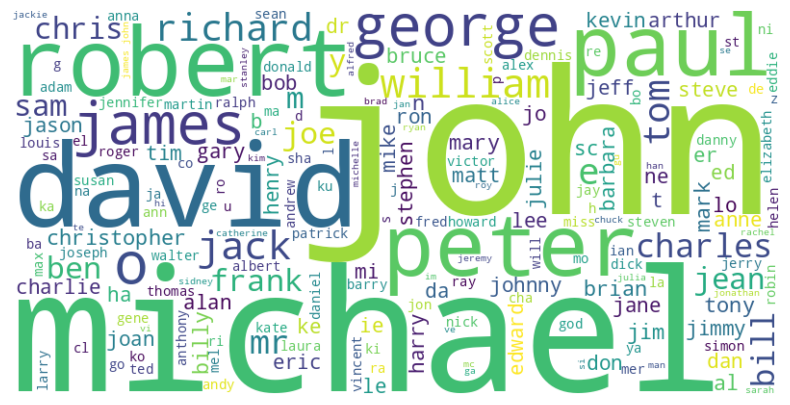

In [ ]:
# combining all the words in the positive sentiment dataset tagged as B-Per
person_list =[]
for x in temp_df['B-PER']:
  if x is not np.nan:
    person_list.extend(list(set(ast.literal_eval(x))))
text=''
for row in person_list:
    text +=", "+ "".join(x.lower() for x in row)
# Generate the word cloud for positive traindata
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

 we can observe there is indeed some names like john, david, michael and robert that are predominant in positive traindata wordcloud




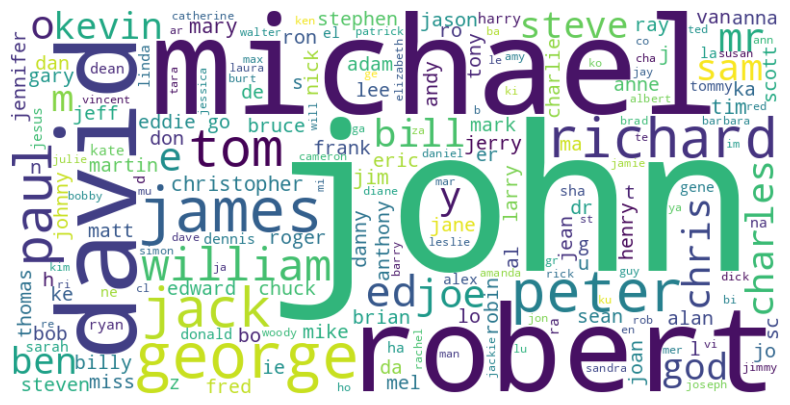

In [ ]:
# combining all the words in the negative sentiment dataset tagged as B-Per

neg_person_list =[]
for x in neg_temp_df['B-PER']:
  if x is not np.nan:
    neg_person_list.extend(list(set(ast.literal_eval(x))))
text=''
for row in neg_person_list:
    text +=", "+ "".join(x.lower() for x in row)
# Generate the word cloud for negative sentiment dataset
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

 we  observe there are some names similar to positive like john, david, michael and robert. We are sensing here that these names are neutral. Let us check with % to understand the frequency better


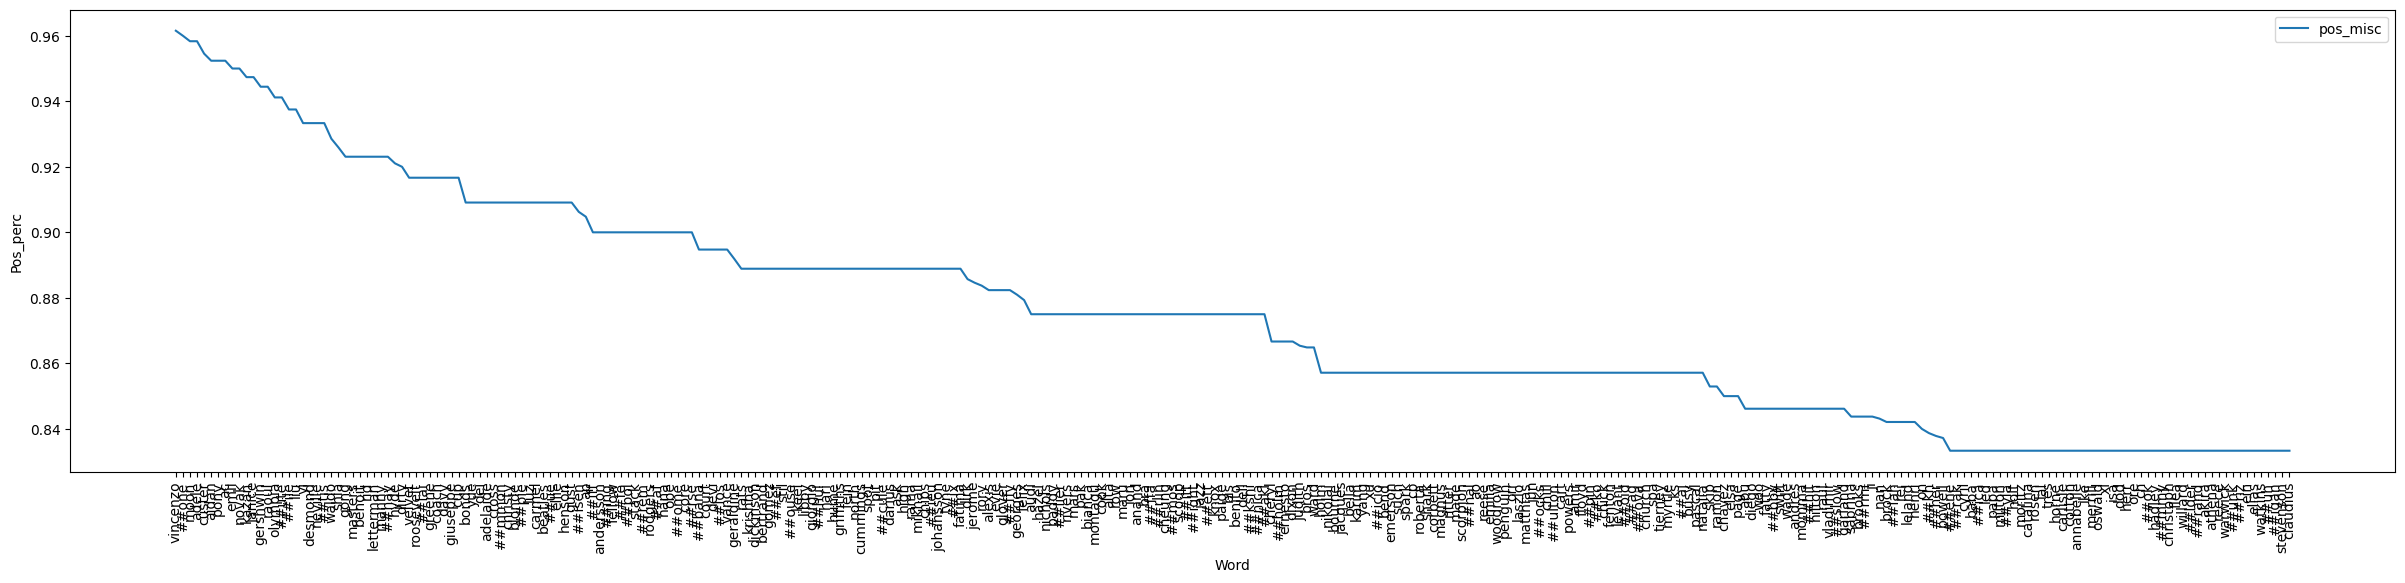

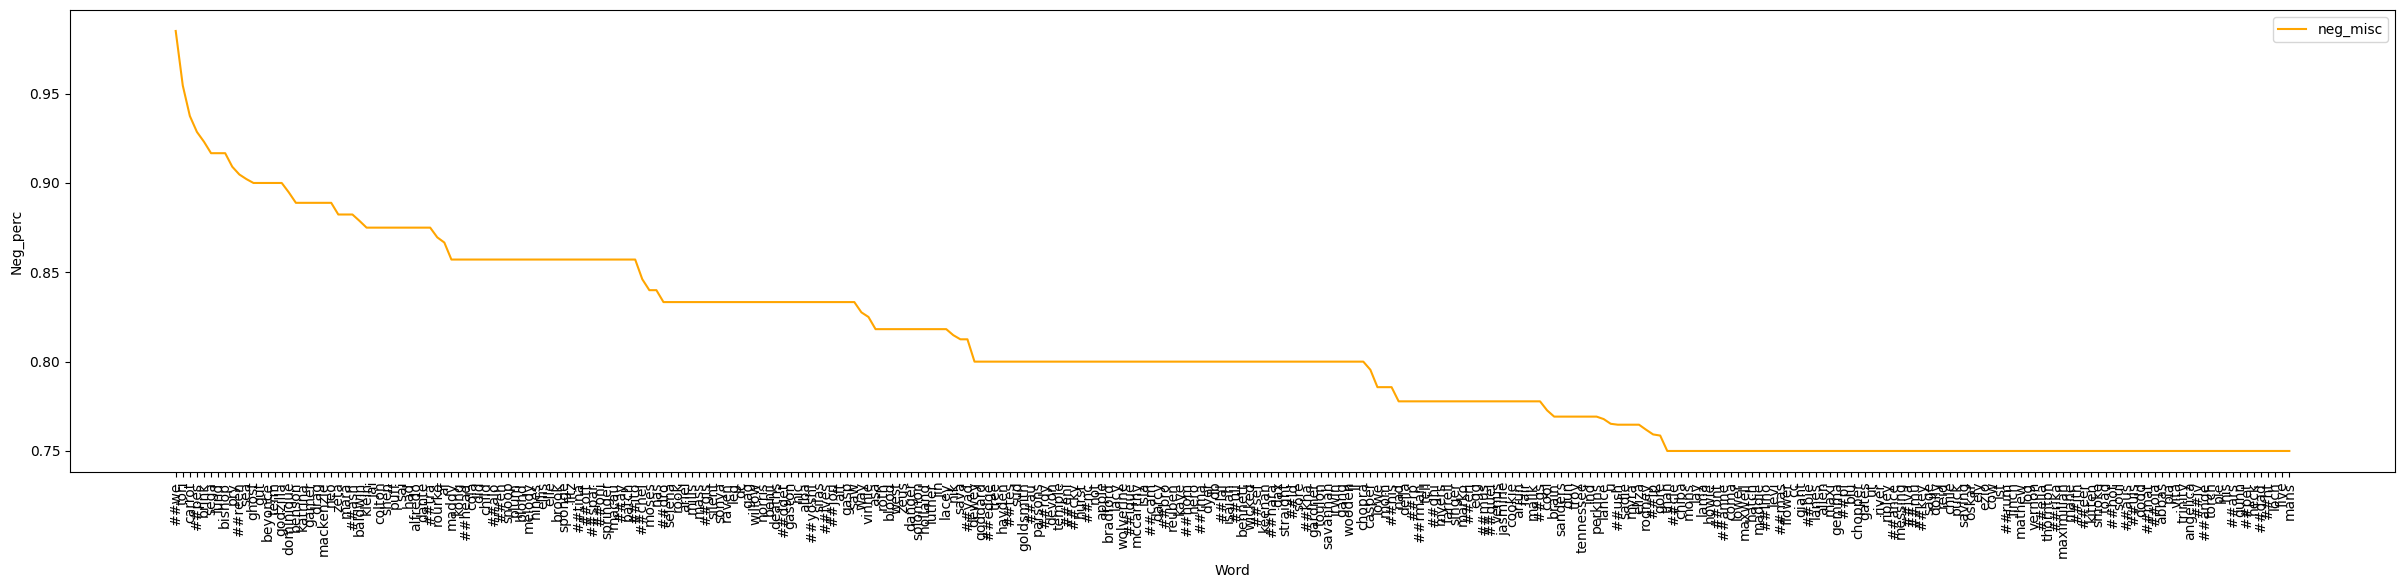

In [13]:
# combine all the positive sentiment words to a single list
text=[]
for row in temp_df['B-PER']:
    if row is not np.nan:
      text.extend(list(set(ast.literal_eval(row))))

value_counts = Counter(text)
counts_df = pd.DataFrame(list(value_counts.items()), columns=['Word', 'Pos_Count']) # calculate the frequency of each word

# combine all the negative sentiment words to a single list
neg_text=[]
for row in neg_temp_df['B-PER']:
    if row is not np.nan:
      neg_text.extend(list(set(ast.literal_eval(row))))

neg_value_counts = Counter(neg_text)
neg_counts_df = pd.DataFrame(list(neg_value_counts.items()), columns=['Word', 'Neg_Count']) # calculate the frequency of each word

# combine to identify the ratio against the total frequency of the word
nnp_df =pd.merge(counts_df,neg_counts_df, on ='Word',how='outer')
nnp_df['Total_count']=nnp_df['Pos_Count']+nnp_df['Neg_Count']
nnp_df['Pos_perc']=nnp_df['Pos_Count']/nnp_df['Total_count']
nnp_df['Neg_perc']=nnp_df['Neg_Count']/nnp_df['Total_count']
#plotting the positive sentiment names
kk=nnp_df.sort_values('Pos_perc',ascending=False)[0:300] # filtering out only 300 words
neg_kk=nnp_df.sort_values('Neg_perc')[0:300] # filtering out only 300 words
plt.figure(figsize=(30, 6))
sns.lineplot(x=kk['Word'], y=kk['Pos_perc'], label='pos_misc')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed'
plt.legend()
plt.show()
#plotting the negative sentiment names
kk=nnp_df.sort_values('Pos_perc',ascending=False).reset_index(drop=True)[0:300]
neg_kk=nnp_df.sort_values('Neg_perc',ascending=False).reset_index(drop=True)[0:300]
plt.figure(figsize=(30, 6))
sns.lineplot(x=neg_kk['Word'], y=neg_kk['Neg_perc'], label='neg_misc',color='Orange')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed'
plt.legend()
plt.show()

From the above graph, we can observe that few of the names have ver high positive sentiment, while few have very high negative sentiment. So we decided to split the data into 3 groups:
1. positive names
2. negative names
3. neutral names

Hypothesis:

the use of embeddings is able to remove any bias on sentiment with regards to these groups.

We will be considering techniques like F-stat and chi-square test
- F-stat is used to prove whether there is significant difference between the means of three groups.
- While Chi-squaretest technique is used to prove whether there is any significant association between the categorical variables.

**Extracting the postive sentiment names**
- we first obtained the list of names with the positive sentiment
- then we removed wrongly classified names manually
- we finally kept around 100 names

In [100]:
pos_names=[]
#  filtered the names to have minmum of 5 mentions in reviews
for name in kk[kk['Total_count']>=5]['Word'][0:200]:
  pos_names.append(name)

#manually filtered names from pos_names list
pos_names=['vincenzo', 'adele', 'moon', 'custer', 'pony', 'aidan', 'novak', 'emil', 'kazan', 'janice', 'gershwin', 'raoul',
           'olympia', 'liu', 'desmond', 'neville', 'waldo', 'shia', 'gong', 'masters', 'benoit',
           'manny', 'hyde','roosevelt', 'greene', 'giuseppe', 'davy', 'velvet', 'yue', 'beatles', 'christy', 'dei', 'blonde',
           'gust', 'henson', 'carmel', 'adelaide', 'luz', 'ellie', 'rodgers',  'hana', 'andersson',  'vance',  'devi',
           'geraldine', 'libby', 'cummings', 'fatima', 'hari', 'gomez', 'fein', 'rama', 'giorgio', 'griffiths', 'tyne', 'pit',
           'darius', 'dickinson', 'krishna', 'mikhail', 'keel',  'bertrand', 'johansson',  'jerome', 'alexis', 'evie', 'georges',
           'felix', 'benito', 'nichols',  'mars', 'bianca', 'hazel', 'paige','knox', 'maru',  'cheung', 'anand','montagu',
           'cheryl', 'ernesto', 'dixon', 'judith', 'roberta', 'jun', 'xu', 'yang', 'floyd',  'holm', 'ritter', 'fenton', 'laszlo',
            'magnus',  'corbett',  'emilia', 'pascal', 'reese', 'cart', 'amir', 'scorpion', 'myrtle', 'bend', 'bella',
            'levant', 'natalia', 'emerson']
pos_names_df = kk[kk['Word'].isin(pos_names)][['Word','Pos_perc']][(nnp_df['Pos_perc']>0.8)].reset_index(drop=True)
pos_names_df.head(3)


<ipython-input-100-915a35874af3>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pos_names_df = kk[kk['Word'].isin(pos_names)][['Word','Pos_perc']][(nnp_df['Pos_perc']>0.8)].reset_index(drop=True)


,Word,Pos_perc
0,moon,0.958333
1,hyde,0.921053
2,adelaide,0.909091


In [101]:
neg_names=[]
#  filtered the names to have minmum of 5 mentions in reviews

for name in neg_kk[neg_kk['Total_count']>=5]['Word'][0:200]:
  neg_names.append(name)
#manually filtered names from neg_names list
neg_names= ['tori', 'carrot', 'brink', 'lund', 'sega', 'bishop', 'beyonce', 'term', 'dominique', 'katrina',  'benson', 'neo',
            'mackenzie', 'zeta',  'mara', 'baldwin',  'jai', 'colton', 'dante', 'klein', 'puff', 'sai', 'alfredo', 'shen',
            'rourke', 'melody', 'patch', 'sponge',   'ellis', 'springer', 'kong', 'maddy',  'cola', 'elle', 'brook',  'nas', 'moses',
            'mills', 'ariel', 'alba', 'selena', 'raven', 'silent', 'sonya', 'rook', 'willow', 'leg',  'benji', 'norris', 'nic', 'gag',
            'gaston', 'silas', 'vinnie', 'solomon', 'lacey', 'jin', 'roth', 'zeus', 'holland', 'luther', 'nik', 'sava', 'parsons',
            'mccarthy',  'bennett', 'kaye', 'dyer', 'toulon', 'darcy', 'isaiah', 'savannah', 'reuben', 'bradford', 'hayden',
            'sud', 'isla', 'dewey',  'nero', 'devon', 'keenan', 'goddard', 'irwin', 'chopra', 'lacy', 'hurst',  'casper',
            'della', 'nad', 'venus',  'malik', 'marko', 'myers',  'farrell', 'arjun','cool', 'troy', 'perkins', 'sanders']


neg_names_df = neg_kk[neg_kk['Word'].isin(neg_names)][['Word','Neg_perc']].reset_index(drop=True)

In [102]:
#  created neutral names dataframe, filtered the names to have minmum of 5 mentions in reviews

neutral_kk =nnp_df.sort_values('Total_count',ascending=False)[(nnp_df['Pos_perc']==0.50) & (nnp_df['Neg_perc']==0.50)][0:500].reset_index(drop=True)
neutral_names =[]
for name in neutral_kk[neutral_kk['Total_count']>=5]['Word']:
  neutral_names.append(name)
neutral_names = ['dave', 'ro', 'joel', 'ethan', 'harrison', 'ross','veronica', 'laurie', 'dakota', 'chad', 'orlando', 'selma',
                 'reeves',  'benjamin', 'isabel',  'stalin',  'griffith', 'clinton',  'tracey', 'pedro', 'rug', 'daryl',
                  'gladys', 'kai', 'mimi', 'chester', 'tomas', 'kent', 'dawson', 'cody', 'brittany', 'barton',  'marian', 'robertson',
                  'sherman', 'thom', 'teresa',  'alma', 'hanna', 'shaggy', 'artemis', 'macdonald',  'gideon', 'whitney',
                 'frost',  'yan', 'langdon','fide', 'marks', 'sonia',  'sheridan', 'dragon', 'wright',  'shepard', 'jacobs',  'cannon',
                 'jonas', 'aiden',  'levy', 'mina','rolf', 'tex', 'nino', 'christophe',  'carlo', 'mckenna', 'goodman', 'erin',
                 'tudor',  'coleman', 'franks', 'harley', 'ventura',  'wilkinson', 'dahl', 'garrett', 'abby', 'tay', 'esa', 'villa',
                 'laurent', 'julio', 'weaver', 'phoenix', 'erich', 'leroy', 'zee', 'henderson',  'simpson',
                'greenwood', 'helmut', 'clancy', 'dmitri', 'saber', 'sanchez', 'bergen', 'sharif', 'bailey', 'alexa', 'alessandro']

neutral_names_df = neutral_kk[neutral_kk['Word'].isin(neutral_names)][['Word','Neg_perc']].reset_index(drop=True)

<ipython-input-102-51b2a6bbdf1f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  neutral_kk =nnp_df.sort_values('Total_count',ascending=False)[(nnp_df['Pos_perc']==0.50) & (nnp_df['Neg_perc']==0.50)][0:500].reset_index(drop=True)


# Data PreProcessing

In [130]:
train_data=pd.read_csv('train_data.csv') # saved the data to make my life simple
# loaded the data again and this time preprocessed it
positive_traindf = train_data.query('sentiment == 1').reset_index(drop=True)
negative_traindf = train_data.query('sentiment == 0').reset_index(drop=True)
positive_traindf['mod_review']=''
negative_traindf['mod_review']=''
for i,row in enumerate(positive_traindf['review']):
    positive_traindf['mod_review'][i] =text_preprocessing(row)
for i,row in enumerate(negative_traindf['review']):
    negative_traindf['mod_review'][i] =text_preprocessing(row)

<ipython-input-130-ebf161f1174a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_traindf['mod_review'][i] =text_preprocessing(row)
<ipython-input-130-ebf161f1174a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_traindf['mod_review'][i] =text_preprocessing(row)


In [131]:
test_data=pd.read_csv('test_data.csv') # saved the data to make my life simple
# loaded the test data again and this time preprocessed it
positive_testdf = test_data.query('sentiment == 1').reset_index(drop=True)
negative_testdf = test_data.query('sentiment == 0').reset_index(drop=True)
positive_testdf['mod_review']=''
negative_testdf['mod_review']=''
for i,row in enumerate(positive_testdf['review']):
    positive_testdf['mod_review'][i] =text_preprocessing(row)
for i,row in enumerate(negative_testdf['review']):
    negative_testdf['mod_review'][i] =text_preprocessing(row)

<ipython-input-131-d8c7206a38b0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_testdf['mod_review'][i] =text_preprocessing(row)
<ipython-input-131-d8c7206a38b0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_testdf['mod_review'][i] =text_preprocessing(row)


# Proving hypothesis

- In this section we will be proving is the embeddings are able to remove the bias among the groups.
- So we will check with Word2Vec, GLoVE, Conceptnet
We will analyze sentiment using Logistic regression, random forest and LSTM

## Embedding - Word2vec

In [73]:
def get_data_split(embeddings_nm,flg=True):
  '''
  Function to load the embeddings and preprocess datasets
  '''
  def fetch_embeddings(df):
    '''
    function to load embeddings
    '''
    body=[]
    for row in df:
      body.extend(row.split(" "))
    words_common = list(set(body) & set(embeddings.index))
    vectors = embeddings.loc[words_common]
    return vectors
  if flg:
    embeddings = load_embeddings(embeddings_nm)
  else:
    embeddings = embeddings_nm
  pos_vectors = fetch_embeddings(positive_traindf['mod_review'])
  neg_vectors = fetch_embeddings(negative_traindf['mod_review'])
  train_vectors = pd.concat([pos_vectors, neg_vectors])
  train_targets = np.array([1 for entry in pos_vectors.index] + [-1 for entry in neg_vectors.index])
  train_labels =list(pos_vectors.index) + list(neg_vectors.index)

  test_pos_vectors = fetch_embeddings(positive_testdf['mod_review'])
  test_neg_vectors = fetch_embeddings(negative_testdf['mod_review'])

  test_vectors = pd.concat([test_pos_vectors, test_neg_vectors])
  test_targets = np.array([1 for entry in test_pos_vectors.index] + [-1 for entry in test_neg_vectors.index])
  test_labels =list(test_pos_vectors.index) + list(test_neg_vectors.index)
  return train_vectors, train_targets,test_vectors,test_targets,train_labels,test_labels

In [ ]:
# !pip install ConceptNet


In [ ]:
# loading the word2Vec embeddings
from conceptnet5.vectors.formats import load_word2vec_bin
w2v = load_word2vec_bin('GoogleNews-vectors-negative300.bin.gz', nrows=2000000)

# word2vec is case-sensitive, so case-fold its labels
w2v.index = [label.casefold() for label in w2v.index]

# Now we have duplicate labels, so drop the later (lower-frequency) occurrences of the same label
w2v_embeddings = w2v.reset_index().drop_duplicates(subset='index', keep='first').set_index('index')
train_vectors, train_targets,test_vectors,test_targets,train_labels,test_labels =get_data_split(w2v_embeddings,False)

In [ ]:
#logistic regression classifier
sgd_model = SGDClassifier(loss='log_loss', random_state=0, max_iter=100)
sgd_model.fit(train_vectors, train_targets)
# Make predictions on the test set
y_pred_lg_train = sgd_model.predict(train_vectors)
y_pred_lg= sgd_model.predict(test_vectors)
# Evaluate the model
accuracy_lg_train = accuracy_score(train_targets, y_pred_lg_train)
accuracy_lg_test = accuracy_score(y_pred_lg, test_targets)
print(f"Train Set Accuracy: {accuracy_lg_train}")
print(f"Test Set Accuracy: {accuracy_lg_test}")

Train Set Accuracy: 0.5160544749848878
Test Set Accuracy: 0.5116864634079589


In [ ]:
# Decision tree classifier - random forest
classifier = RandomForestClassifier(random_state=42)
classifier.fit(train_vectors, train_targets)
# Make predictions on the test set
y_pred_rf_train = classifier.predict(train_vectors)
y_pred_rf = classifier.predict(test_vectors)

# Evaluate the model
accuracy_rf_train = accuracy_score(train_targets, y_pred_rf_train)
accuracy_rf_test = accuracy_score(y_pred_rf, test_targets)
print(f"Train Set Accuracy: {accuracy_rf_train}")
print(f"Test Set Accuracy: {accuracy_rf_test}")

Train Set Accuracy: 0.6250874136234873
Test Set Accuracy: 0.5009579068367179


In [103]:
NAMES_BY_sentiment = {
    # based on the NER and manual selection
    'pos_names' :pos_names,

    'neg_names': neg_names,
    'neutral_names': neutral_names
}

In [104]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [ ]:
def name_sentiment_table(bias_group_dict,embeddings,model ):
    frames = []
    # embeddings = load_embeddings(embeddings_name)
    for group, name_list in sorted(NAMES_BY_sentiment.items()):
        lower_names = [name.lower() for name in name_list]
        sentiments = words_to_sentiment(lower_names,embeddings,classifier)
        sentiments['group'] = group
        frames.append(sentiments)

    # Put together the data we got from each ethnic group into one big table
    return pd.concat(frames)

name_sentiments = name_sentiment_table(NAMES_BY_sentiment,w2v_embeddings,sgd_model)

### f-stat test

In [ ]:
fstat,pval = stats.f_oneway(
        name_sentiments['sentiment'][name_sentiments['group'] == 'pos_names'],
        name_sentiments['sentiment'][name_sentiments['group'] == 'neg_names'],
        name_sentiments['sentiment'][name_sentiments['group'] == 'neutral_names']
    )
print('F-statistic:',fstat,' With P-value:', pval)

F-statistic: 9.453734245763242  With P-value: 0.00010415853844500458


the p-value is less than 0.5 thus we reject the null hypothesis and say there is a bias as there is  significant differnce between the means of the three groups

### chi-square test

In [108]:
contingency_table = pd.crosstab(name_sentiments['group'], name_sentiments['sentiment'])
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2_stat, ' With P-value:', p_val)

Chi-square statistic: 610.0  With P-value: 0.4695482781220926



The p-value is lesser than 0.5 hence we reject the null- hypothesis

Thus proving that there is no significant association between the groups

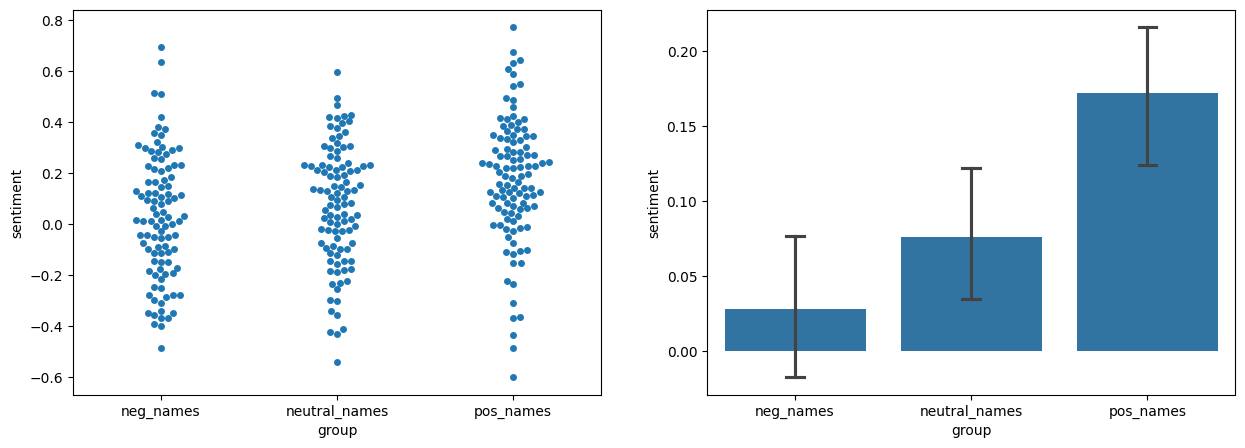

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plot = sns.swarmplot(x='group', y='sentiment', data=name_sentiments)
# plot.set_ylim([-10, 10])
plt.subplot(122)
plot = sns.barplot(x='group', y='sentiment', data=name_sentiments, capsize=.1)

The above swarm plot shows how spare the names are.
The Bar plot shows that the positive names have very strong positive sentiment.


This proves that the word2vec embeddings are not removing the bias of names identified in the dataset. This defeats the hypothesis

In [ ]:
# remvoing all the variables
del w2v_embeddings
del w2v
del sgd_model
del train_vectors
del train_targets
del test_vectors
del test_targets
del train_labels
del test_labels
del load_word2vec_bin
del classifier
del svm_classifier
del nb_model

## Embedding - GloVE

In [121]:
#loading the datset using glove embeddings
train_vectors, train_targets,test_vectors,test_targets,train_labels,test_labels =get_data_split('glove.840B.300d.txt')

In [114]:
#logistic regression classifier
sgd_model = SGDClassifier(loss='log_loss', random_state=0, max_iter=100)
sgd_model.fit(train_vectors, train_targets)
# Make predictions on the test set
y_pred_lg_train = sgd_model.predict(train_vectors)
y_pred_lg= sgd_model.predict(test_vectors)
# Evaluate the model
accuracy_lg_train = accuracy_score(train_targets, y_pred_lg_train)
accuracy_lg_test = accuracy_score(y_pred_lg, test_targets)
print(f"Train Set Accuracy: {accuracy_lg_train}")
print(f"Test Set Accuracy: {accuracy_lg_test}")

Train Set Accuracy: 0.5098535625819612
Test Set Accuracy: 0.5124396135265701


In [ ]:
#logistic regression classifier
sgd_model = SGDClassifier(loss='log_loss', random_state=0, max_iter=100)
sgd_model.fit(train_vectors, train_targets)
# Make predictions on the test set
y_pred_lg_train = sgd_model.predict(train_vectors)
y_pred_lg= sgd_model.predict(test_vectors)
# Evaluate the model
accuracy_lg_train = accuracy_score(train_targets, y_pred_lg_train)
accuracy_lg_test = accuracy_score(y_pred_lg, test_targets)
print(f"Train Set Accuracy: {accuracy_lg_train}")
print(f"Test Set Accuracy: {accuracy_lg_test}")

Train Set Accuracy: 0.5157896676247329
Test Set Accuracy: 0.522565584704313


In [ ]:
# Decision tree classifier - random forest
classifier = RandomForestClassifier(random_state=42)
classifier.fit(train_vectors, train_targets)
# Make predictions on the test set
y_pred_rf_train = classifier.predict(train_vectors)
y_pred_rf = classifier.predict(test_vectors)

# Evaluate the model
accuracy_rf_train = accuracy_score(train_targets, y_pred_rf_train)
accuracy_rf_test = accuracy_score(y_pred_rf, test_targets)
print(f"Train Set Accuracy: {accuracy_rf_train}")
print(f"Test Set Accuracy: {accuracy_rf_test}")

Train Set Accuracy: 0.6740793966639644
Test Set Accuracy: 0.5074848080628428


In [98]:
def name_sentiment_table(bias_group_dict,embeddings_name,model ):
    frames = []
    embeddings = load_embeddings(embeddings_name)
    for group, name_list in sorted(NAMES_BY_sentiment.items()):
        lower_names = [name.lower() for name in name_list]
        sentiments = words_to_sentiment(lower_names,embeddings,sgd_model)
        sentiments['group'] = group
        frames.append(sentiments)

    # Put together the data we got from each ethnic group into one big table
    return pd.concat(frames)


In [115]:
name_sentiments = name_sentiment_table(NAMES_BY_sentiment,'glove.840B.300d.txt',sgd_model)

### F-stat

In [116]:
fstat,pval = stats.f_oneway(
        name_sentiments['sentiment'][name_sentiments['group'] == 'pos_names'],
        name_sentiments['sentiment'][name_sentiments['group'] == 'neg_names'],
        name_sentiments['sentiment'][name_sentiments['group'] == 'neutral_names'])
print('F-statistic:',fstat,' With P-value:', pval)

F-statistic: 3.7565572124299926  With P-value: 0.024463074403147704


In [ ]:
fstat,pval = stats.f_oneway(
        name_sentiments['sentiment'][name_sentiments['group'] == 'pos_names'],
        name_sentiments['sentiment'][name_sentiments['group'] == 'neg_names'],
        name_sentiments['sentiment'][name_sentiments['group'] == 'neutral_names'])
print('F-statistic:',fstat,' With P-value:', pval)

F-statistic: 0.29659963599954803  With P-value: 0.7435578406281861


the p-value is less than 0.5 thus we reject the null hypothesis and say there is a bias as there is  significant differnce between the means of the three groups

### ANOVA

In [117]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(name_sentiments['group'], name_sentiments['sentiment'])
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2_stat, ' With P-value:', p_val)

Chi-square statistic: 610.0  With P-value: 0.4695482781220926


In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(name_sentiments['group'], name_sentiments['sentiment'])
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2_stat, ' With P-value:', p_val)

Chi-square statistic: 610.0  With P-value: 0.4695482781220926


The p-value is lesser than 0.5 hence we reject the null- hypothesis

Thus proving that there is no significant association between the groups

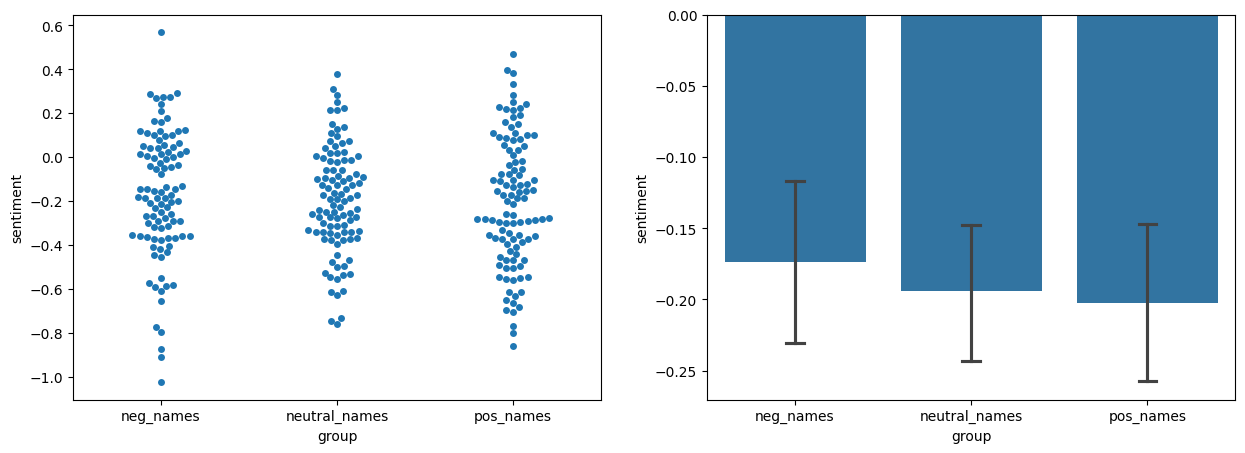

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plot = sns.swarmplot(x='group', y='sentiment', data=name_sentiments)
# plot.set_ylim([-10, 10])
plt.subplot(122)
plot = sns.barplot(x='group', y='sentiment', data=name_sentiments, capsize=.1)

The swarm plot shows that the distribution for the names is parse. And in the bar plot we can notince that all of the names have very strong sentiment

In [ ]:
# del embeddings
del sgd_model
del train_vectors
del train_targets
del test_vectors
del test_targets
del train_labels
del test_labels
del classifier
del svm_classifier
del nb_model

# Embedding - Conceptnet

In [118]:

train_vectors, train_targets,test_vectors,test_targets,train_labels,test_labels =get_data_split('numberbatch-en-17.04b.txt')

In [96]:
#logistic regression classifier
sgd_model = SGDClassifier(loss='log_loss', random_state=0, max_iter=100)
sgd_model.fit(train_vectors, train_targets)
# Make predictions on the test set
y_pred_lg_train = sgd_model.predict(train_vectors)
y_pred_lg= sgd_model.predict(test_vectors)
# Evaluate the model
accuracy_lg_train = accuracy_score(train_targets, y_pred_lg_train)
accuracy_lg_test = accuracy_score(y_pred_lg, test_targets)
print(f"Train Set Accuracy: {accuracy_lg_train}")
print(f"Test Set Accuracy: {accuracy_lg_test}")

Train Set Accuracy: 0.5173193637002491
Test Set Accuracy: 0.5195104362805978


In [ ]:
# Decision tree classifier - random forest
classifier = RandomForestClassifier(random_state=42)
classifier.fit(train_vectors, train_targets)
# Make predictions on the test set
y_pred_rf_train = classifier.predict(train_vectors)
y_pred_rf = classifier.predict(test_vectors)

# Evaluate the model
accuracy_rf_train = accuracy_score(train_targets, y_pred_rf_train)
accuracy_rf_test = accuracy_score(y_pred_rf, test_targets)
print(f"Train Set Accuracy: {accuracy_rf_train}")
print(f"Test Set Accuracy: {accuracy_rf_test}")

Train Set Accuracy: 0.6127861069148058
Test Set Accuracy: 0.5070571827057183


In [ ]:
#naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(train_vectors, train_targets)
# Make predictions on the test set
y_pred_nb_train = nb_model.predict(train_vectors)
y_pred_nb= nb_model.predict(test_vectors)
# Evaluate the model
accuracy_nb_train = accuracy_score(train_targets, y_pred_nb_train)
accuracy_nb_test = accuracy_score(y_pred_nb, test_targets)
print(f"Train Set Accuracy: {accuracy_nb_train}")
print(f"Test Set Accuracy: {accuracy_nb_test}")

Train Set Accuracy: 0.5230726264075254
Test Set Accuracy: 0.5307670850767086


In [ ]:
from sklearn.svm import SVC
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the SVM classifier on the training data
svm_classifier.fit(train_vectors, train_targets)

# Make predictions on the test set
y_pred_svm_train = svm_classifier.predict(train_vectors)
y_pred_svm= svm_classifier.predict(test_vectors)
# Evaluate the model
accuracy_svm_train = accuracy_score(train_targets, y_pred_svm_train)
accuracy_svm_test = accuracy_score(y_pred_svm, test_targets)
print(f"Train Set Accuracy: {accuracy_svm_train}")
print(f"Test Set Accuracy: {accuracy_svm_test}")

Train Set Accuracy: 0.5243040127962627
Test Set Accuracy: 0.5321059972105997


In [105]:

name_sentiments = name_sentiment_table(NAMES_BY_sentiment,'numberbatch-en-17.04b.txt',sgd_model)

### F-stat

In [106]:
fstat,pval = stats.f_oneway(
        name_sentiments['sentiment'][name_sentiments['group'] == 'pos_names'],
        name_sentiments['sentiment'][name_sentiments['group'] == 'neg_names'],
        name_sentiments['sentiment'][name_sentiments['group'] == 'neutral_names'])
print('F-statistic:',fstat,' With P-value:', pval)

F-statistic: 4.0321623325438996  With P-value: 0.01869935248195413


the p-value is less than 0.5 thus we reject the null hypothesis and say there is a bias as there is  significant difference between the means of the three groups
The p-value is lesser than 0.5 hence we reject the null- hypothesis

Thus proving that there is no significant association between the groups

### chi-squared test

In [107]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(name_sentiments['group'], name_sentiments['sentiment'])
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2_stat, ' With P-value:', p_val)

Chi-square statistic: 610.0  With P-value: 0.4695482781220926


The p-value is lesser than 0.5 hence we reject the null- hypothesis

Thus proving that there is no significant association between the groups

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


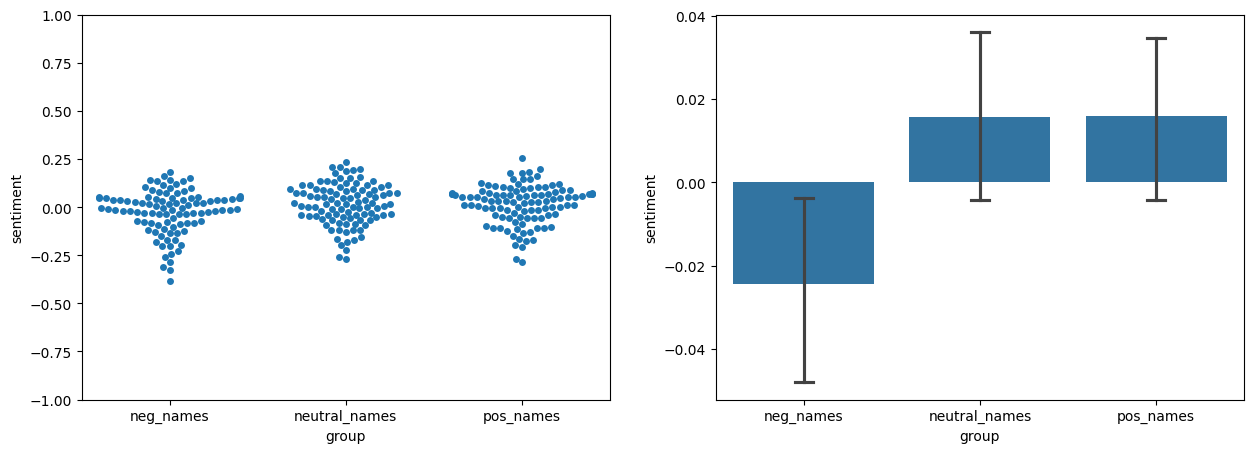

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plot = sns.swarmplot(x='group', y='sentiment', data=name_sentiments)
plot.set_ylim([-1, 1])
plt.subplot(122)
plot = sns.barplot(x='group', y='sentiment', data=name_sentiments, capsize=.1)

from the above we can notice thatt he swarm plot has significantly reduced the bias, and the bar plot also shows that the names are almost neutalized

However, our model accuracy has not increased. even though the bias is almost removed

In [ ]:
# del embeddings
# del sgd_model
# del classifier
del svm_classifier
# del nb_model
del train_vectors
del train_targets
del test_vectors
del test_targets
del train_labels
del test_labels

In [85]:
def get_data_split(embeddings_nm,flg=True):
  def fetch_embeddings(df):
    # body = "".join(x for x in df)
    # all_vectos = []
    body=[]
    for row in df:
      # body += " ".join(x for x in row)
      # print(body)
      body.extend(row)
      # print(body)
      # break
    words_common = list(set(body) & set(embeddings.index))
    vectors = embeddings.loc[words_common]
    # all_vectos.append(vectors)
    # break
    return vectors
  if flg:
    embeddings = load_embeddings(embeddings_nm)
  else:
    embeddings = embeddings_nm
  pos_vectors = fetch_embeddings(positive_traindf['mod_review'])

  print(len(negative_testdf['mod_review']))
  test_pos_vectors = fetch_embeddings(positive_testdf['mod_review'])
  neg_vectors = fetch_embeddings(negative_traindf['mod_review'])
  test_neg_vectors = fetch_embeddings(negative_testdf['mod_review'])
  print(len(test_pos_vectors))
  train_vectors = pd.concat([pos_vectors, neg_vectors])
  train_targets = np.array([1 for entry in pos_vectors.index] + [0 for entry in neg_vectors.index])
  # labels = list(pos_vectors.index) + list(neg_vectors.index)
  train_labels =list(pos_vectors.index) + list(neg_vectors.index)
  test_vectors = pd.concat([test_pos_vectors, test_neg_vectors])
  print(len(test_vectors))
  test_targets = np.array([1 for entry in test_pos_vectors.index] + [0 for entry in test_neg_vectors.index])
  print(len(test_targets))
  test_labels =list(test_pos_vectors.index) + list(test_neg_vectors.index)
  print(len(test_labels))
  return train_vectors, train_targets,test_vectors,test_targets,train_labels,test_labels

In [122]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.layers import LSTM, Embedding

In [ ]:
# tried difference models,

In [ ]:

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_vectors.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_vectors, train_targets, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_pred_nn_train = (model.predict(train_vectors) > 0.5).astype(int)  # Convert probabilities to binary predictions
# Evaluate the model on the test set
y_pred_nn = (model.predict(test_vectors) > 0.5).astype(int)  # Convert probabilities to binary predictions
accuracy_nn_train = accuracy_score(train_targets, y_pred_nn_train)
accuracy_nn_test = accuracy_score(y_pred_nn, test_targets)
print(f"Train Set Accuracy: {accuracy_nn_train}")
print(f"Test Set Accuracy: {accuracy_nn_test}")

Epoch 1/10
2216/2216 [==============================] - 48s 21ms/step - loss: 0.6876 - accuracy: 0.5556 - val_loss: 0.8515 - val_accuracy: 0.0000e+00
Epoch 2/10
2216/2216 [==============================] - 6s 3ms/step - loss: 0.6868 - accuracy: 0.5556 - val_loss: 0.7928 - val_accuracy: 0.0000e+00
Epoch 3/10
2216/2216 [==============================] - 6s 3ms/step - loss: 0.6862 - accuracy: 0.5552 - val_loss: 0.8019 - val_accuracy: 0.0070
Epoch 4/10
2216/2216 [==============================] - 7s 3ms/step - loss: 0.6854 - accuracy: 0.5575 - val_loss: 0.8231 - val_accuracy: 0.0260
Epoch 5/10
2216/2216 [==============================] - 6s 3ms/step - loss: 0.6847 - accuracy: 0.5586 - val_loss: 0.8142 - val_accuracy: 0.0363
Epoch 6/10
2216/2216 [==============================] - 7s 3ms/step - loss: 0.6838 - accuracy: 0.5599 - val_loss: 0.8145 - val_accuracy: 0.0755
Epoch 7/10
2216/2216 [==============================] - 6s 3ms/step - loss: 0.6823 - accuracy: 0.5635 - val_loss: 0.7885 - val

In [28]:
from keras.preprocessing.sequence import pad_sequences

In [132]:
from keras.preprocessing.text import Tokenizer

In [133]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(pd.concat([positive_traindf['mod_review'],negative_traindf['mod_review']]))
X_train = word_tokenizer.texts_to_sequences(pd.concat([positive_traindf['mod_review'],negative_traindf['mod_review']]))


X_test = word_tokenizer.texts_to_sequences(pd.concat([positive_testdf['mod_review'],negative_testdf['mod_review']]))

In [134]:
vocab_length = len(word_tokenizer.word_index)+1
vocab_length

159465

In [135]:
max_len=300
X_train=pad_sequences(X_train, padding='post',maxlen=max_len)
X_test=pad_sequences(X_test, padding='post',maxlen=max_len)

In [30]:
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('numberbatch-en-17.04b.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [31]:
embedding_matrix = zeros((vocab_length, 300))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector


embedding_matrix.shape

(159465, 300)

In [36]:
lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 300, weights=[embedding_matrix], input_length=max_len , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
lstm_model.fit(X_train, train_targets, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 143s 564ms/step - loss: 0.0223 - acc: 0.9962 - val_loss: 1.1954 - val_acc: 0.8926
Epoch 2/10
250/250 [==============================] - 142s 566ms/step - loss: 1.0131e-05 - acc: 1.0000 - val_loss: 1.2774 - val_acc: 0.8926
Epoch 3/10
250/250 [==============================] - 145s 580ms/step - loss: 5.3875e-06 - acc: 1.0000 - val_loss: 1.3266 - val_acc: 0.8926
Epoch 4/10
250/250 [==============================] - 153s 613ms/step - loss: 3.6298e-06 - acc: 1.0000 - val_loss: 1.3632 - val_acc: 0.8926
Epoch 5/10
250/250 [==============================] - 144s 575ms/step - loss: 2.6647e-06 - acc: 1.0000 - val_loss: 1.3932 - val_acc: 0.8926
Epoch 6/10
250/250 [==============================] - 144s 574ms/step - loss: 2.0536e-06 - acc: 1.0000 - val_loss: 1.4193 - val_acc: 0.8926
Epoch 7/10
250/250 [==============================] - 139s 557ms/step - loss: 1.6329e-06 - acc: 1.0000 - val_loss: 1.4425 - val_acc: 0.8926
Epoch 8/10
250/250 [====

In [120]:
lstm_score = lstm_model.evaluate(test_vectors, test_targets, verbose=1)
lstm_score

1561/1561 [==============================] - 179s 114ms/step - loss: 1.7671 - acc: 0.8819
[6.96712064743042, 0.5018628835678101]


We can finally observe that the accurasy has increased

The conferences that will be interested in my work

Conference on Fairness, Accountability, and Transparency (FAccT): This conference focuses on the fairness, accountability, and transparency of AI and machine learning systems, making it a suitable venue for discussing bias in datasets and algorithms.

ACM Transactions on Social Computing (TOIS): This journal covers research at the intersection of computing and social behavior, including topics related to bias and fairness in AI systems